In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sb

raw_data = pd.read_csv("Covid Data.csv")
raw_data

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HYPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASSIFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


# Preprocessing

In [84]:

def drop_nulls(df, cols):
    cols = list(cols)
    cols.remove("AGE")
    for c in cols:
        df = df[df[c] <= 15]
    return df

In [85]:
x = lambda a: 0 if a == 2 else 1

In [86]:
# Data cleaning
data = raw_data.copy()

# remove non covid patients
data = data[data["CLASSIFICATION_FINAL"] < 4]

# binary death conversion
data['DEATH_STATUS'] = data['DATE_DIED'].apply(lambda x: 0 if x == "9999-99-99" else 1)
data.drop('DATE_DIED', axis=1, inplace=True)

# Fill in missing pregnancy data for males
data.loc[data["SEX"] == 2, "PREGNANT"] = 2

# drop 97 and 99 values for non age columns
data = drop_nulls(data, data.columns)

# removing nulls removed all non-hospital patients
data.drop("PATIENT_TYPE", axis=1, inplace=True)

# data[["INTUBED", "PATIENT_TYPE", "SEX", "PNEUMONIA", "PREGNANT", "DIABETES", "COPD", "INMSUPR",
#       "HYPERTENSION", "OTHER_DISEASE", "RENAL_CHRONIC", "TOBACCO", "ICU"]].apply(x)
data["INTUBED"] = data["INTUBED"].apply(x)
# data["PATIENT_TYPE"] = data["PATIENT_TYPE"].apply(x)
data["SEX"] = data["SEX"].apply(x)
data["PNEUMONIA"] = data["PNEUMONIA"].apply(x)
data["PREGNANT"] = data["PREGNANT"].apply(x)
data["DIABETES"] = data["DIABETES"].apply(x)
data["COPD"] = data["COPD"].apply(x)
data["HYPERTENSION"] = data["HYPERTENSION"].apply(x)
data["OTHER_DISEASE"] = data["OTHER_DISEASE"].apply(x)
data["RENAL_CHRONIC"] = data["RENAL_CHRONIC"].apply(x)
data["TOBACCO"] = data["TOBACCO"].apply(x)
data["ICU"] = data["ICU"].apply(x)
data["CARDIOVASCULAR"] = data["CARDIOVASCULAR"].apply(x)
data["INMSUPR"] = data["INMSUPR"].apply(x)
data["OBESITY"] = data["OBESITY"].apply(x)
data

,USMER,MEDICAL_UNIT,SEX,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HYPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASSIFICATION_FINAL,ICU,DEATH_STATUS
2,2,1,0,1,0,55,0,1,0,2,0,0,0,0,0,0,0,3,0,1
5,2,1,1,0,1,40,0,0,0,2,0,0,0,0,0,0,0,3,0,0
8,2,1,1,0,0,37,0,1,0,2,0,1,0,0,1,0,0,3,0,0
9,2,1,1,0,0,25,0,0,0,2,0,0,0,0,0,0,0,3,0,0
11,2,1,0,0,0,24,0,0,0,2,0,0,0,0,0,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047913,1,13,0,0,0,54,0,1,0,2,0,0,0,0,0,0,0,3,0,0
1047919,1,13,0,0,0,62,0,0,0,2,0,0,0,0,0,0,0,3,0,0
1047928,1,13,1,0,0,47,0,1,0,2,0,0,0,0,0,0,0,3,0,0
1047929,1,13,0,0,0,72,0,1,0,2,0,0,0,1,1,0,0,3,0,0


# Visuals

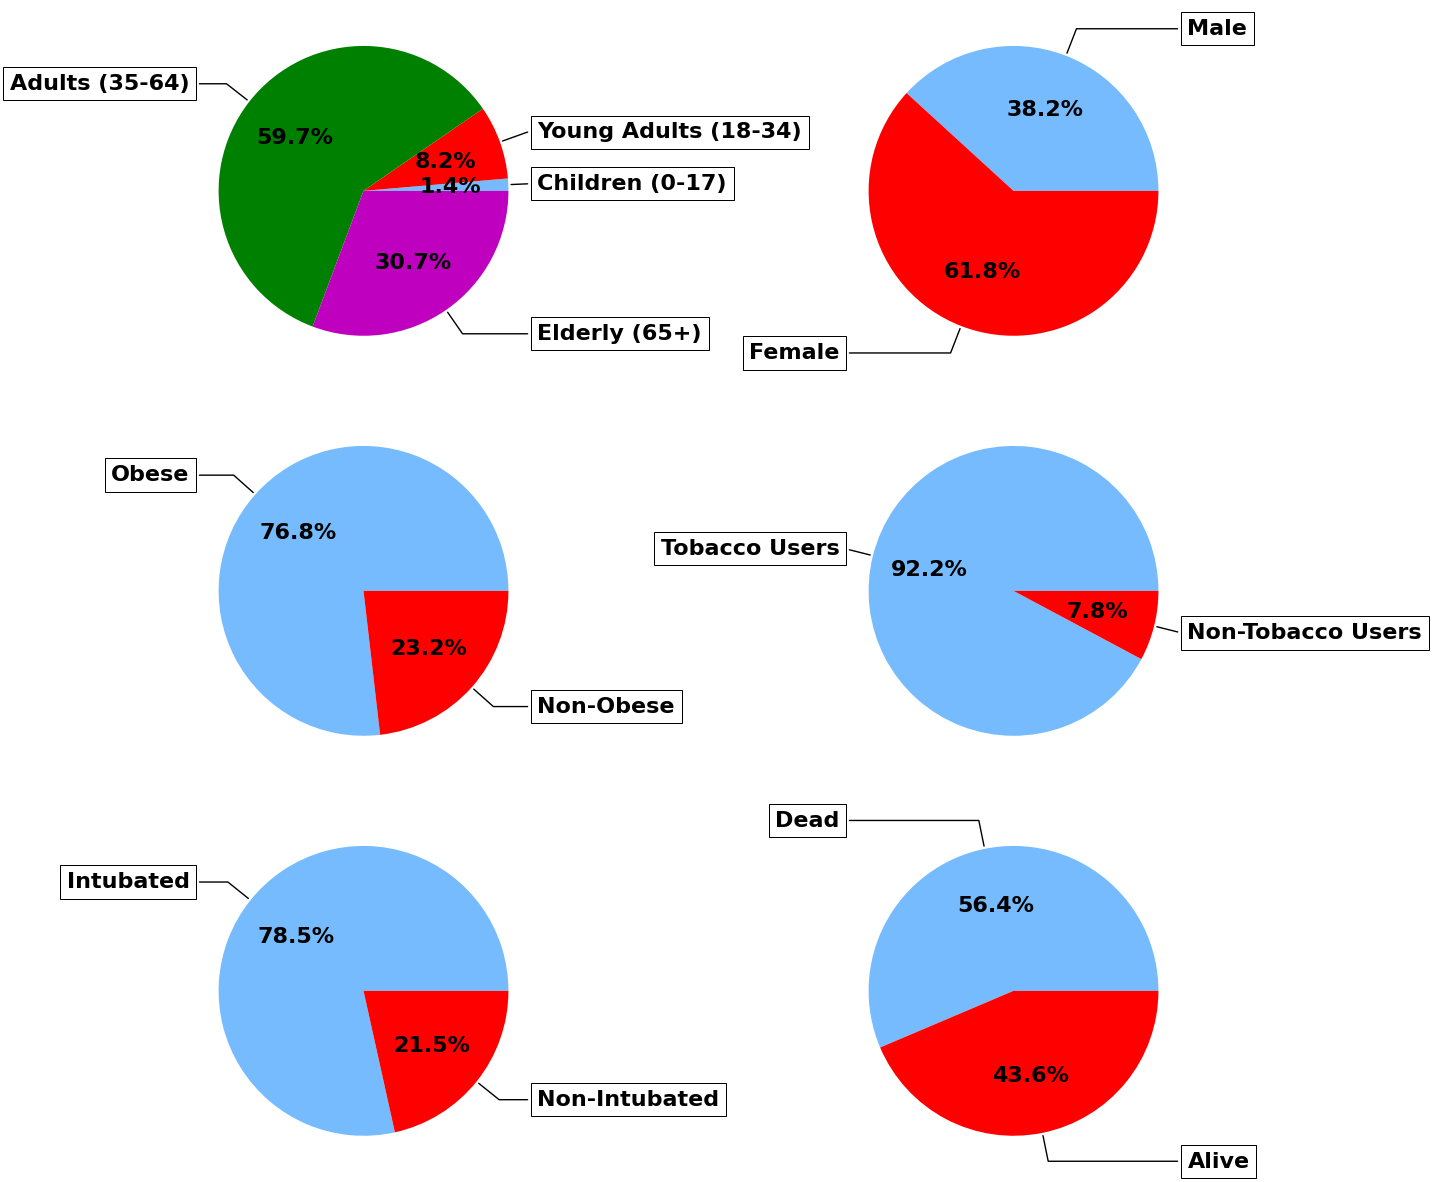

In [87]:
import matplotlib
font = {'size'   : 16,
'weight' : 'bold'}

matplotlib.rc('font', **font)

children = 18 > data['AGE']
young_adults = np.logical_and(35 > data['AGE'], data['AGE'] >= 18)
adults = np.logical_and(65 > data['AGE'], data['AGE'] >= 35)
elderly = data['AGE'] >= 65

females = data["SEX"] == 0
males = data["SEX"] == 1

obese = data["OBESITY"] == 0
non_obese = data["OBESITY"] == 1

tobacco_users = data["TOBACCO"] == 0
non_tobacco_users = data["TOBACCO"] == 1

intubated = data["INTUBED"] == 0
non_intubated = data["INTUBED"] == 1

dead = data["DEATH_STATUS"] == 0
alive = data["DEATH_STATUS"] == 1

age_groups = {
    "Children (0-17)": children,
    "Young Adults (18-34)": young_adults,
    "Adults (35-64)": adults,
    "Elderly (65+)": elderly
}

sexes = {
    "Male": males,
    "Female": females
}

obesity = {
    "Obese": obese,
    "Non-Obese": non_obese
}

tobacco = {
    "Tobacco Users": tobacco_users,
    "Non-Tobacco Users": non_tobacco_users
}

intubation = {
    "Intubated": intubated,
    "Non-Intubated": non_intubated
}

death = {
    "Dead": dead,
    "Alive": alive
}

figure, axes = plt.subplots(3, 2, figsize=(13, 12))
figure.tight_layout(pad=0.0)
ax = axes.ravel()

# figure.suptitle("Overall Demographics of COVID-19 Patients")

for i, d in enumerate([age_groups, sexes, obesity, tobacco, intubation, death]):
    wedges, text1, text2 = ax[i].pie(
        [len(data[cond]) for cond in d.values()],
        #labels=d.keys(),
        autopct='%1.1f%%',
        colors=['xkcd:sky blue','r','g','m'])
    labels = list(d.keys())

    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

    for j, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax[i].annotate(labels[j], xy=(x, y), xytext=(1.2*np.sign(x), 1.2*y),
                    horizontalalignment=horizontalalignment, **kw)


[Text(0, 0, '1301'),
 Text(0, 0, '7480'),
 Text(0, 0, '39660'),
 Text(0, 0, '12553')]

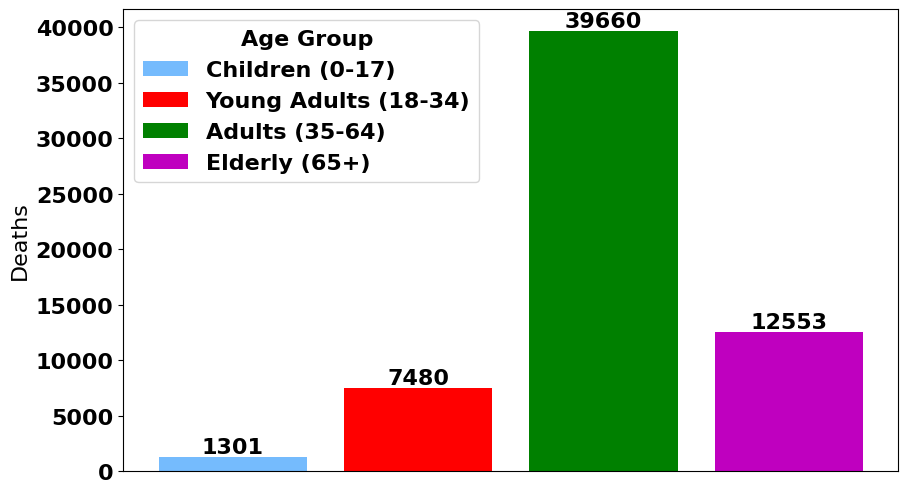

In [89]:
#figure.suptitle("Demographics of COVID-19 Deaths")
figure, axes = plt.subplots(1, 1, figsize=(10, 6))

axes.bar(age_groups.keys(), [len(data[dead & cond]) for cond in age_groups.values()], color=['xkcd:sky blue','r','g','m', 'y'], label=age_groups.keys())
axes.set_ylabel('Deaths')
axes.get_xaxis().set_ticks([])
axes.legend(labels=age_groups.keys(), title='Age Group')
axes.bar_label(axes.containers[0])


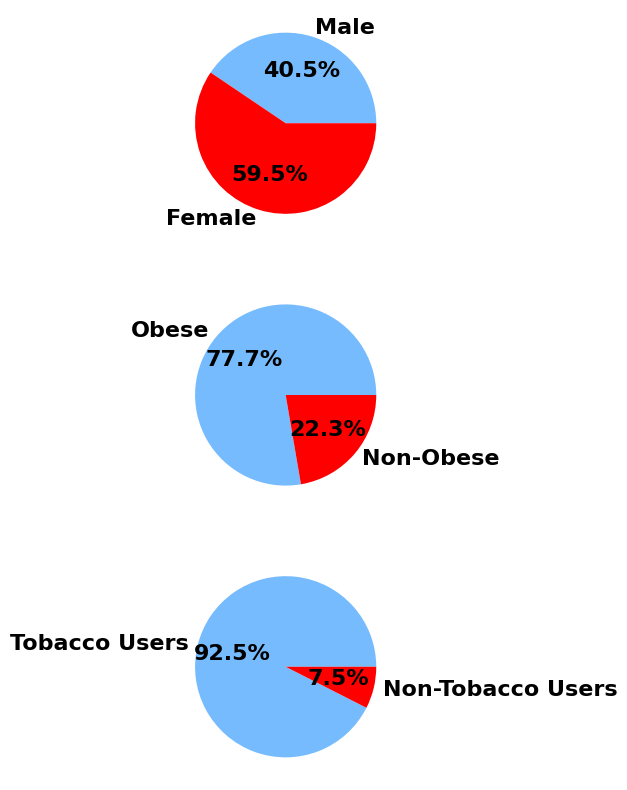

In [90]:
# Overall demographics of dead patients
figure, axes = plt.subplots(3, 1, figsize=(5,10))
ax = axes.ravel()
for i, d in enumerate([sexes, obesity, tobacco]):
    ax[i].pie(
        [len(data[dead & cond]) for cond in d.values()],
        labels=d.keys(),
        autopct='%1.1f%%',
        colors=['xkcd:sky blue','r','g','m'])

    #labels = list(d.keys())

    #bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    #kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

    #for j, p in enumerate(wedges):
    #    ang = (p.theta2 - p.theta1)/2. + p.theta1
    #    y = np.sin(np.deg2rad(ang))
    #    x = np.cos(np.deg2rad(ang))
    #    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    #    connectionstyle = f"angle,angleA=0,angleB={ang}"
    #    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    #    ax[i].annotate(labels[j], xy=(x, y), xytext=(1.2*np.sign(x), 1.2*y),
    #                horizontalalignment=horizontalalignment, **kw)

[Text(0, 0, '1255'),
 Text(0, 0, '7885'),
 Text(0, 0, '51253'),
 Text(0, 0, '24486')]

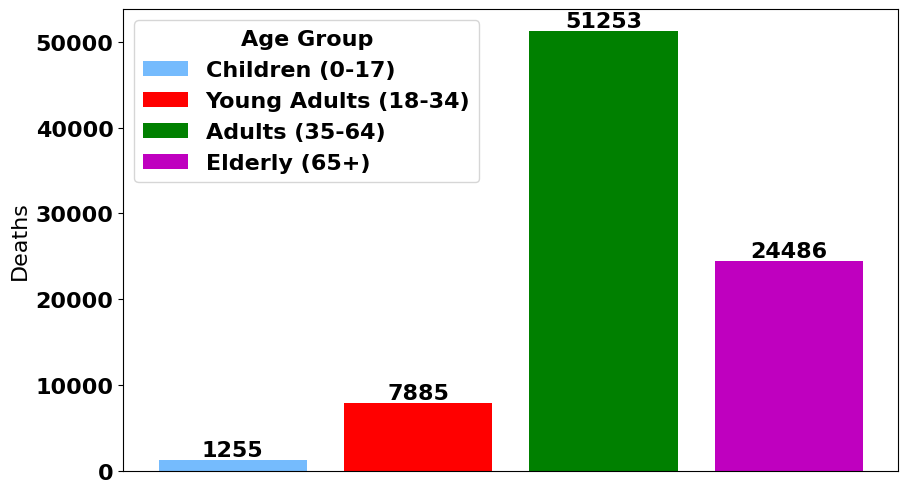

In [91]:
figure, axes = plt.subplots(1, 1, figsize=(10, 6))

#figure.suptitle("Demographics of COVID-19 Intubations")

axes.bar(age_groups.keys(), [len(data[intubated & cond]) for cond in age_groups.values()], color=['xkcd:sky blue','r','g','m', 'y'], label=age_groups.keys())
axes.set_ylabel('Deaths')
axes.get_xaxis().set_ticks([])
axes.legend(labels=age_groups.keys(), title='Age Group')
axes.bar_label(axes.containers[0])

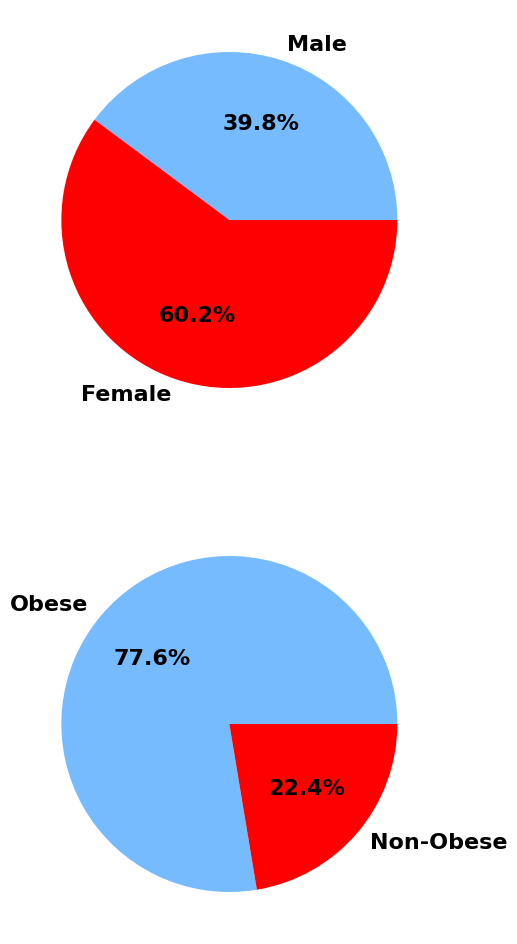

In [92]:
figure, axes = plt.subplots(2, 1, figsize=(7,12))
ax = axes.ravel()
for i, d in enumerate([sexes, obesity]): # 100% of tobacco users were intubated
    ax[i].pie(
        [len(data[tobacco_users & cond]) for cond in d.values()],
        labels=d.keys(),
        autopct='%1.1f%%',
        colors=['xkcd:sky blue','r','g','m'])

    #labels = list(d.keys())

    #bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    #kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

    #for j, p in enumerate(wedges):
    #    ang = (p.theta2 - p.theta1)/2. + p.theta1
    #    y = np.sin(np.deg2rad(ang))
    #    x = np.cos(np.deg2rad(ang))
    #    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    #    connectionstyle = f"angle,angleA=0,angleB={ang}"
    #    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    #    ax[i].annotate(labels[j], xy=(x, y), xytext=(1.2*np.sign(x), 1.2*y),
    #                horizontalalignment=horizontalalignment, **kw)

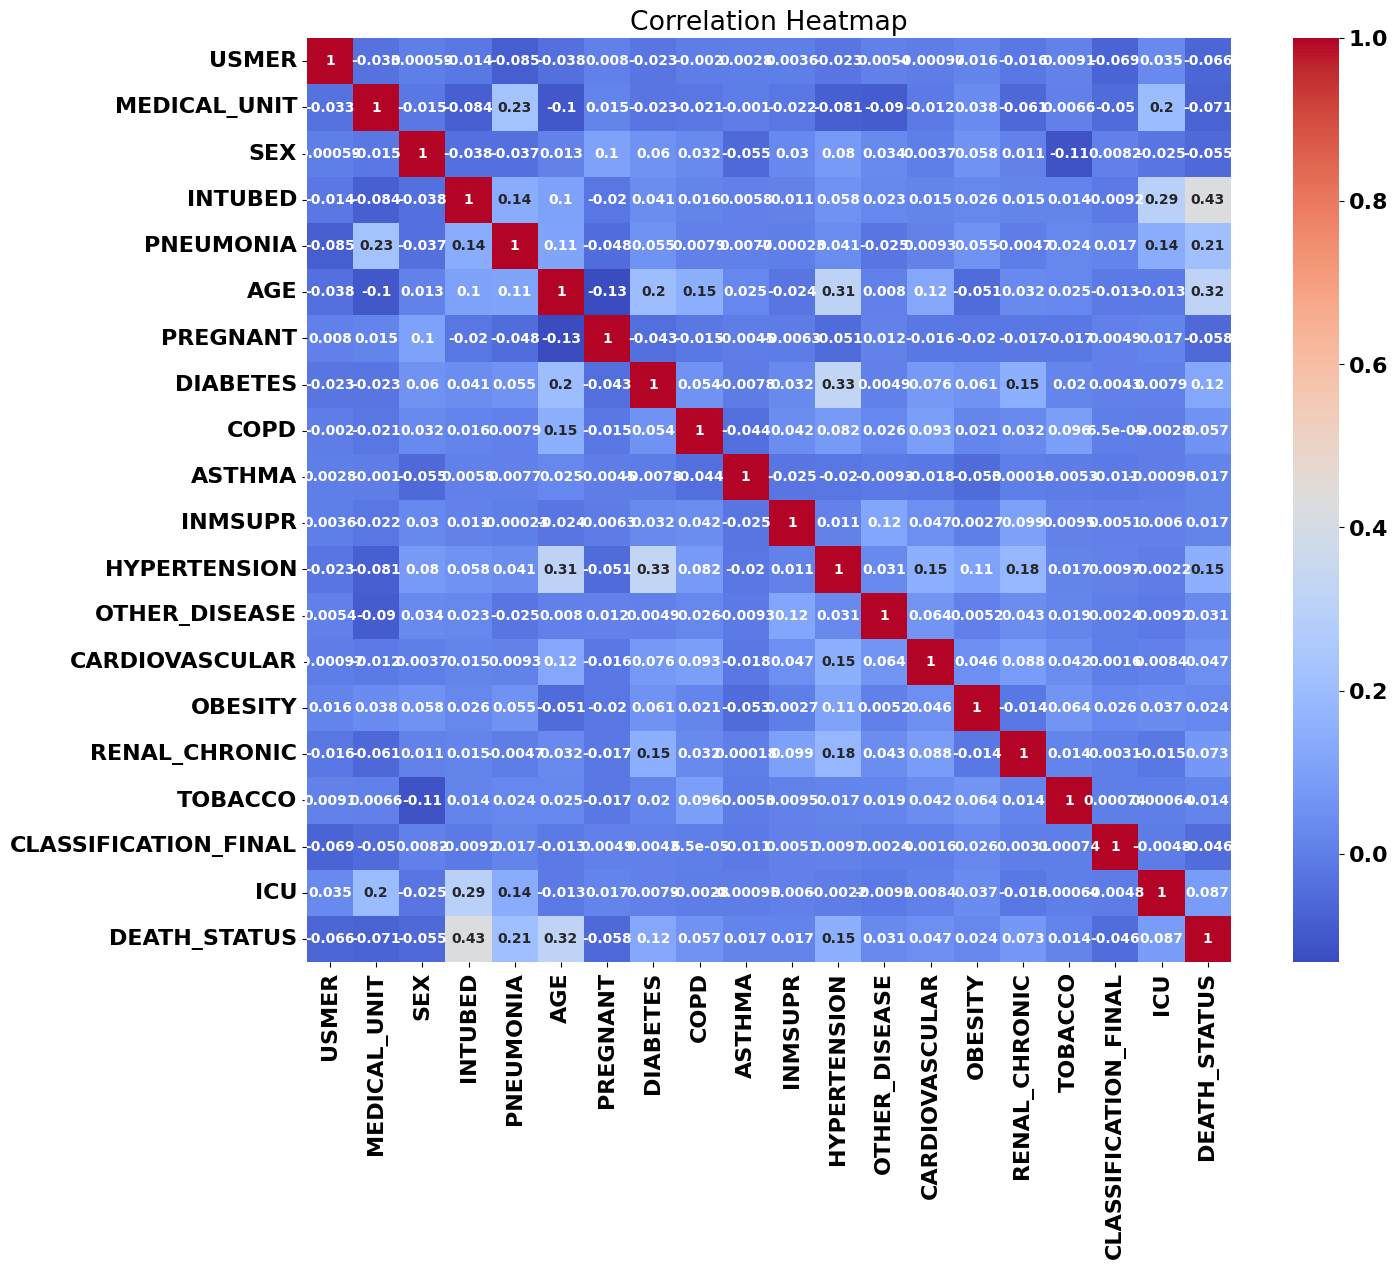

In [93]:
import seaborn as sns
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, annot_kws={'size': 10})
plt.title('Correlation Heatmap')
plt.show()

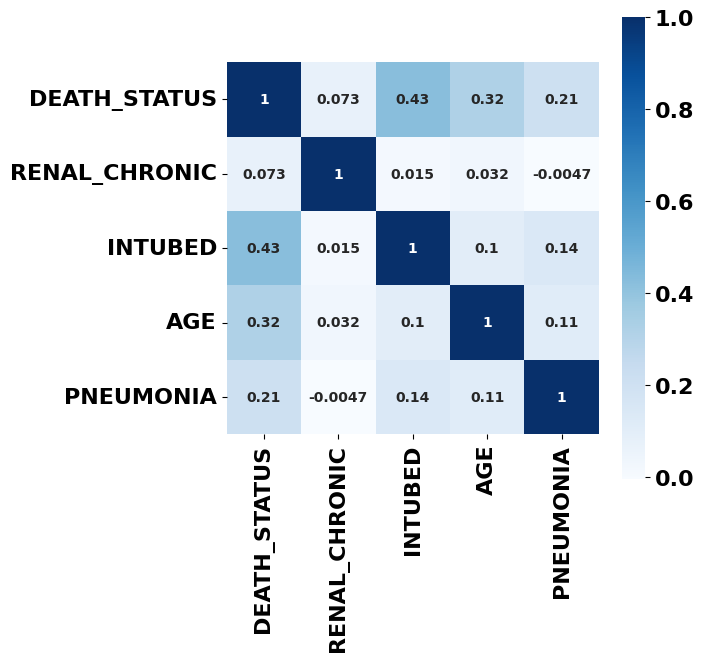

In [94]:
# smaller matrix with just important cols, for presentation
small_corr_matrix = data[["DEATH_STATUS", "RENAL_CHRONIC", "INTUBED", "AGE", "PNEUMONIA"]].corr()
plt.figure(figsize=(6, 6))
sns.heatmap(small_corr_matrix, annot=True, cmap='Blues', square=True, annot_kws={'size': 10})
plt.show()

In [95]:
data.shape

(108160, 20)

# Modeling

### dimension reduction

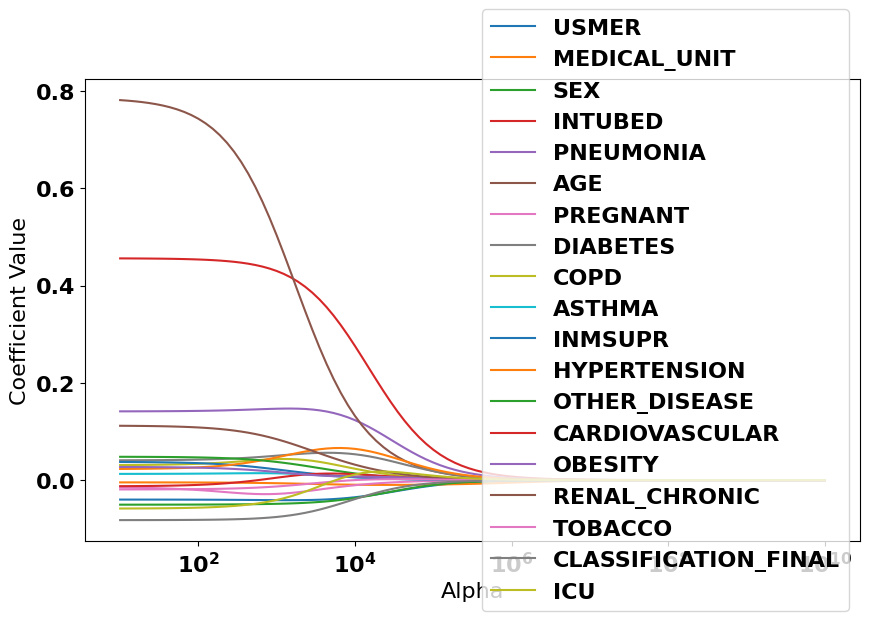

Text(0, 0.5, 'Mean Squared Error')

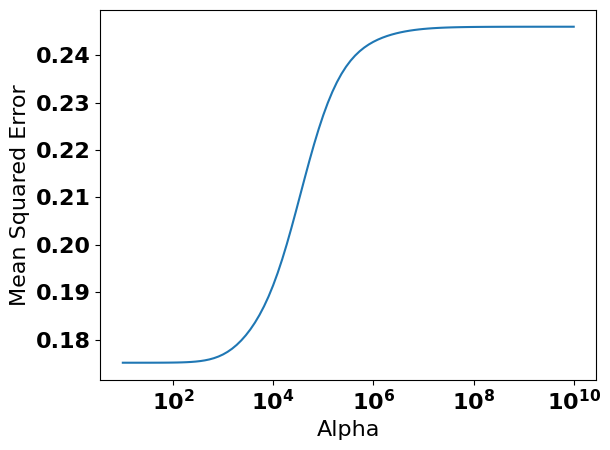

In [96]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['AGE'] = scaler.fit_transform(data[['AGE']])

y = data['DEATH_STATUS'].copy()
X = pd.get_dummies(data.drop('DEATH_STATUS', axis=1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

alphas = np.logspace(1, 10, 100)
coefficients = []
mses = []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    y_pred = ridge_model.predict(X_test)

    coefficients.append(ridge_model.coef_)
    mses.append(mean_squared_error(y_test, y_pred))

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.plot(alphas, coefficients)
plt.xscale('log')  # using a logarithmic scale for better visibility
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.legend(X.columns, loc = 'right')
plt.show()

#mse = mean_squared_error(y_test, y_pred)
plt.plot(alphas, mses)
plt.xscale('log')  # using a logarithmic scale for better visibility
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')

In [97]:
# Create a LASSO regression object with alpha=0.1
ridge = Ridge(alpha=100)

# Fit the LASSO model to the training data
ridge.fit(X, y)

# Get the coefficients of the LASSO model
coefficients = ridge.coef_
print(coefficients)

# Select the features with non-zero coefficients
selected_features = [i for i, coef in enumerate(coefficients) if abs(coef) > 0.1]

# Use the selected features to train and test the classification model
X = X.iloc[:, selected_features]

[-0.04199828 -0.00488068 -0.04753024  0.45706034  0.13949442  0.75177086
 -0.01273609  0.04017785  0.02977803  0.02538181  0.03478306  0.02467526
  0.04324606 -0.00300495  0.02545881  0.10445424 -0.01768883 -0.07827322
 -0.05353764]


In [98]:
X

,INTUBED,PNEUMONIA,AGE,RENAL_CHRONIC
2,1,0,0.523810,0
5,0,1,0.380952,0
8,0,0,0.352381,0
9,0,0,0.238095,0
11,0,0,0.228571,0
...,...,...,...,...
1047913,0,0,0.514286,0
1047919,0,0,0.590476,0
1047928,0,0,0.447619,0
1047929,0,0,0.685714,0


In [99]:
selected_features

[3, 4, 5, 15]

In [100]:
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [101]:
pca = PCA()
pca.fit(X)
X_pca = pca.transform(X)

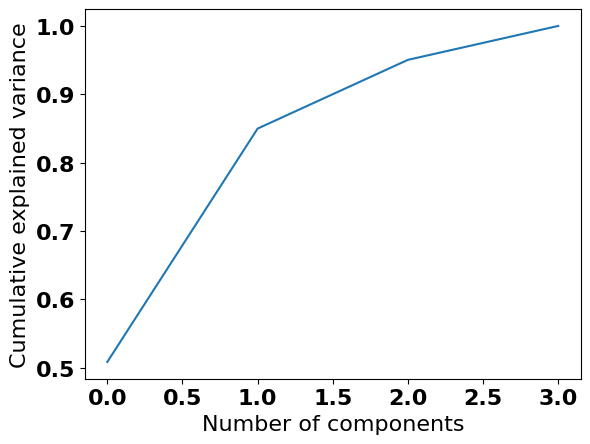

In [102]:
cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cum_explained_variance)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [103]:
n_components = 2

pca = PCA(n_components = n_components)
pca.fit(X)
X_pca = pca.transform(X)

X_pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(n_components)])
X_pca_df

,PC1,PC2
0,0.308806,0.980059
1,-0.218570,-0.332428
2,0.703720,0.055045
3,0.709108,0.052548
4,0.709557,0.052340
...,...,...
108155,0.696088,0.058583
108156,0.692496,0.060248
108157,0.699231,0.057126
108158,0.688007,0.062329


### model building

#### logreg

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X_pca_df, y, test_size=0.2, random_state=0)

In [105]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', 'l1'],
}

logreg = LogisticRegression(solver='liblinear')

grid_search_LogReg = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

grid_search_LogReg.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search_LogReg.best_params_)
print("Best Score:", grid_search_LogReg.best_score_)

logreg_predictions = grid_search_LogReg.predict(X_test)

print("Model Accuracy: ", accuracy_score(y_test, logreg_predictions))
print("Classification Report:\n", classification_report(y_test, logreg_predictions))

Best Parameters: {'C': 0.001, 'penalty': 'l2'}
Best Score: 0.7085220668749763
Model Accuracy:  0.7145894970414202
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.94      0.79     12188
           1       0.85      0.42      0.56      9444

    accuracy                           0.71     21632
   macro avg       0.76      0.68      0.68     21632
weighted avg       0.75      0.71      0.69     21632



#### knn

In [106]:
param_grid = {
    'n_neighbors': [3, 5, 15, 25],
    'weights': ['uniform', 'distance']
}

knn = KNeighborsClassifier()

grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

grid_search_knn.fit(X_train, y_train)

print("Best Parameters:", grid_search_knn.best_params_)
print("Best Score:", grid_search_knn.best_score_)

knn_predictions = grid_search_knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, knn_predictions))
print("Classification Report:")
print(classification_report(y_test, knn_predictions))

Best Parameters: {'n_neighbors': 25, 'weights': 'uniform'}
Best Score: 0.7264122515158175
Accuracy: 0.7267936390532544
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.77      0.76     12188
           1       0.69      0.67      0.68      9444

    accuracy                           0.73     21632
   macro avg       0.72      0.72      0.72     21632
weighted avg       0.73      0.73      0.73     21632



#### RFC

In [107]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5]
}
rfc = RandomForestClassifier()

grid_search_forest = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy')

grid_search_forest.fit(X_train, y_train)

print("Best Parameters:", grid_search_forest.best_params_)
print("Best Score:", grid_search_forest.best_score_)

rf_predictions = grid_search_forest.predict(X_test)

print("Model Accuracy: ", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))

Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best Score: 0.734918164408327
Model Accuracy:  0.7322485207100592
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.82      0.77     12188
           1       0.72      0.63      0.67      9444

    accuracy                           0.73     21632
   macro avg       0.73      0.72      0.72     21632
weighted avg       0.73      0.73      0.73     21632



#### QDA

In [108]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda_grid = {
    'reg_param': [0.0, 0.1, 0.01, 0.001]
}

clf = QuadraticDiscriminantAnalysis()
qda_search = GridSearchCV(clf, qda_grid, cv=5)
qda_search.fit(X_train, y_train)

qda_predictions = qda_search.predict(X_test)

print("Best Parameters:", qda_search.best_params_)
print("Best Score:", qda_search.best_score_)

print("Accuracy:", accuracy_score(y_test, qda_predictions))
print("Classification Report:")
print(classification_report(y_test, qda_predictions))

Best Parameters: {'reg_param': 0.0}
Best Score: 0.7085220668749763
Accuracy: 0.7145894970414202
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.94      0.79     12188
           1       0.85      0.42      0.56      9444

    accuracy                           0.71     21632
   macro avg       0.76      0.68      0.68     21632
weighted avg       0.75      0.71      0.69     21632



#### LDA

In [109]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_grid = {
    'solver': ['svd', 'lsqr', 'eigen']
}

lda = LinearDiscriminantAnalysis()
lda_search = GridSearchCV(lda, lda_grid, cv=5)

lda_search.fit(X_train, y_train)
lda_predictions = lda_search.predict(X_test)

print("Best Parameters:", lda_search.best_params_)
print("Best Score:", lda_search.best_score_)

print("Accuracy:", accuracy_score(y_test, lda_predictions))
print("Classification Report:")
print(classification_report(y_test, lda_predictions))

Best Parameters: {'solver': 'svd'}
Best Score: 0.7085220668749763
Accuracy: 0.7145894970414202
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.94      0.79     12188
           1       0.85      0.42      0.56      9444

    accuracy                           0.71     21632
   macro avg       0.76      0.68      0.68     21632
weighted avg       0.75      0.71      0.69     21632



#### NB

In [110]:
from sklearn.naive_bayes import GaussianNB

gnb_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

gnb = GaussianNB()
gnb_search = GridSearchCV(gnb, gnb_grid, cv=5)

gnb_search.fit(X_train, y_train)
gnb_predictions = gnb_search.predict(X_test)

print("Best Parameters:", gnb_search.best_params_)
print("Best Score:", gnb_search.best_score_)

print("Accuracy:", accuracy_score(y_test, gnb_predictions))
print("Classification Report:")
print(classification_report(y_test, gnb_predictions))

Best Parameters: {'var_smoothing': 1e-09}
Best Score: 0.7085220668749763
Accuracy: 0.7145894970414202
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.94      0.79     12188
           1       0.85      0.42      0.56      9444

    accuracy                           0.71     21632
   macro avg       0.76      0.68      0.68     21632
weighted avg       0.75      0.71      0.69     21632



## example patient predictor

In [111]:
age = 75
intubated = 1
pneumonia = 1
renal_chronic = 1

scaled_age = scaler.transform([[age]])[0][0]

input_features = [intubated, pneumonia, scaled_age, renal_chronic]

input_features_pca = pca.transform([input_features])

prediction = grid_search_forest.predict(input_features_pca)[0]

print(f'Prediction: {prediction}')

probabilities = grid_search_forest.predict_proba(input_features_pca)
print(f'Probability of death: {probabilities[0][1]}')

Prediction: 1
Probability of death: 0.8962837498429721


/home/sam/Documents/school/Grad/MATH 7243/venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/home/sam/Documents/school/Grad/MATH 7243/venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/home/sam/Documents/school/Grad/MATH 7243/venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/sam/Documents/school/Grad/MATH 7243/venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## experimenting with different PCAs

In [112]:
pcas = []
knn_accuracy = []
logreg_accuracy = []
rfc_accuracy = []
lda_accuracy = []
qda_accuracy = []
nb_accuracy = []


for i in range(1, 4):

    n_components = i
    pcas.append(i)

    pca = PCA(n_components = n_components)
    pca.fit(X)
    X_pca = pca.transform(X)

    X_pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(n_components)])

    X_train, X_test, y_train, y_test = train_test_split(X_pca_df, y, test_size=0.2, random_state=0)

    knn = KNeighborsClassifier(n_neighbors=15, weights='uniform')
    knn.fit(X_train, y_train)
    knn_predictions = knn.predict(X_test)
    knn_accuracy.append(accuracy_score(y_test, knn_predictions))

    logreg = LogisticRegression(solver='liblinear', C= 10, penalty= 'l2')
    logreg.fit(X_train, y_train)
    logreg_predictions = logreg.predict(X_test)
    logreg_accuracy.append(accuracy_score(y_test, logreg_predictions))

    rfc = RandomForestClassifier(max_depth=10, min_samples_split=2, n_estimators=100)
    rfc.fit(X_train, y_train)
    rfc_predictions = rfc.predict(X_test)
    rfc_accuracy.append(accuracy_score(y_test, rfc_predictions))

    clf = QuadraticDiscriminantAnalysis()
    qda_predictions = clf.fit(X_train, y_train).predict(X_test)
    qda_accuracy.append(accuracy_score(y_test, qda_predictions))

    lda = LinearDiscriminantAnalysis()
    lda_predictions = lda.fit(X_train, y_train).predict(X_test)
    lda_accuracy.append(accuracy_score(y_test, lda_predictions))

    gnb = GaussianNB()
    nb_predictions = gnb.fit(X_train, y_train).predict(X_test)
    nb_accuracy.append(accuracy_score(y_test, nb_predictions))

    print("PCAs:" ,i)
    print("KNN Accuracy: ", accuracy_score(y_test, knn_predictions))
    print("LogReg Accuracy: ", accuracy_score(y_test, logreg_predictions))
    print("RFC Accuracy: ", accuracy_score(y_test, rfc_predictions))
    print("LDA Accuracy: ", accuracy_score(y_test, lda_predictions))
    print("QDA Accuracy: ", accuracy_score(y_test, qda_predictions))
    print("NB Accuracy: ", accuracy_score(y_test, nb_predictions))


PCAs: 1
KNN Accuracy:  0.7298909023668639
LogReg Accuracy:  0.5755824704142012
RFC Accuracy:  0.7328032544378699
LDA Accuracy:  0.5741494082840237
QDA Accuracy:  0.5741494082840237
NB Accuracy:  0.5741494082840237
PCAs: 2
KNN Accuracy:  0.722448224852071
LogReg Accuracy:  0.7145894970414202
RFC Accuracy:  0.7322485207100592
LDA Accuracy:  0.7145894970414202
QDA Accuracy:  0.7145894970414202
NB Accuracy:  0.7145894970414202
PCAs: 3
KNN Accuracy:  0.7168546597633136
LogReg Accuracy:  0.7160687869822485
RFC Accuracy:  0.7319711538461539
LDA Accuracy:  0.7160687869822485
QDA Accuracy:  0.7118620562130178
NB Accuracy:  0.7118620562130178


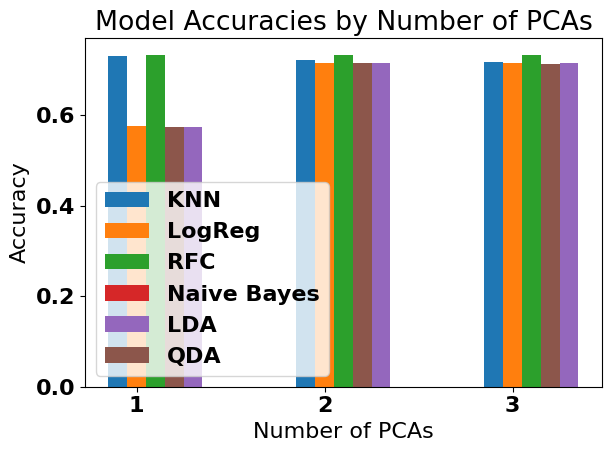

In [113]:
num_bars = len(pcas)

bar_width = 0.1

index = np.arange(num_bars)

plt.bar(index, knn_accuracy, bar_width, label='KNN')
plt.bar(index + bar_width, logreg_accuracy, bar_width, label='LogReg')
plt.bar(index + 2*bar_width, rfc_accuracy, bar_width, label='RFC')
plt.bar(index + 3*bar_width, nb_accuracy, bar_width, label='Naive Bayes')
plt.bar(index + 4*bar_width, lda_accuracy, bar_width, label='LDA')
plt.bar(index + 3*bar_width, qda_accuracy, bar_width, label='QDA')

plt.xlabel('Number of PCAs')
plt.ylabel('Accuracy')
plt.title('Model Accuracies by Number of PCAs')
plt.xticks(index + bar_width, pcas)
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()


## neural net

In [114]:
from sklearn.preprocessing import LabelEncoder
import keras
encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
encoder.fit(y_test)
y_test = encoder.transform(y_test)
model = keras.models.Sequential([
    keras.layers.Dense(100, input_shape = (len(X_train.columns),)),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])
model.summary()

2024-04-23 22:39:30.211494: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-23 22:39:30.214914: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-23 22:39:30.257346: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-23 22:39:30.257434: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-23 22:39:30.260054: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               400       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 20701 (80.86 KB)
Trainable params: 20701 (80.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [115]:
model.compile(loss="binary_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

# Train using mini batch
history_mb = model.fit(
    X_train,
    y_train,
    batch_size=128,
    steps_per_epoch=len(X_train) // 128,
    epochs=5,
    verbose=1,
    validation_data=(X_test, y_test))

Epoch 1/5
676/676 [==============================] - 4s 5ms/step - loss: 0.6157 - accuracy: 0.7002 - val_loss: 0.5760 - val_accuracy: 0.7146
Epoch 2/5
676/676 [==============================] - 3s 5ms/step - loss: 0.5751 - accuracy: 0.7089 - val_loss: 0.5691 - val_accuracy: 0.7161
Epoch 3/5
676/676 [==============================] - 3s 5ms/step - loss: 0.5726 - accuracy: 0.7123 - val_loss: 0.5685 - val_accuracy: 0.7161
Epoch 4/5
676/676 [==============================] - 4s 5ms/step - loss: 0.5722 - accuracy: 0.7123 - val_loss: 0.5685 - val_accuracy: 0.7161
Epoch 5/5
676/676 [==============================] - 4s 5ms/step - loss: 0.5720 - accuracy: 0.7123 - val_loss: 0.5685 - val_accuracy: 0.7161


In [116]:
model.evaluate(X_test.astype('float32'), y_test.astype('float32'))

676/676 [==============================] - 2s 3ms/step - loss: 0.5685 - accuracy: 0.7161


[0.5685431957244873, 0.7160688042640686]

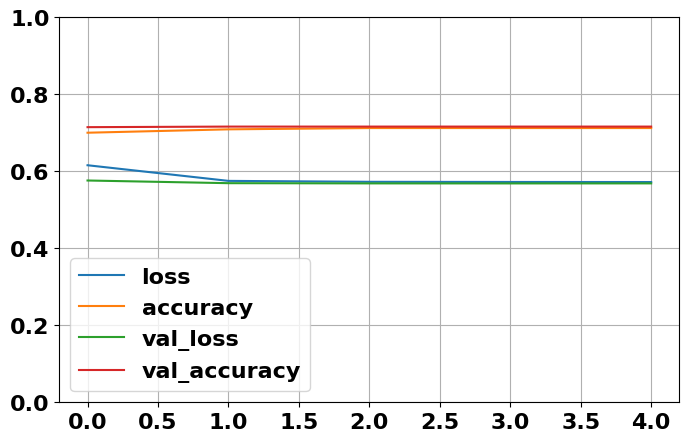

In [117]:
pd.DataFrame(history_mb.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

In [118]:
# train using stochastic gradient decent
history_sgd = model.fit(
    X_train,
    y_train,
    steps_per_epoch=len(X_train) // 128,
    epochs=5,
    validation_data=(X_test.astype('float32'), y_test.astype('float32'))
)

Epoch 1/5
676/676 [==============================] - 5s 7ms/step - loss: 0.5719 - accuracy: 0.7123 - val_loss: 0.5683 - val_accuracy: 0.7161
Epoch 2/5
676/676 [==============================] - 5s 7ms/step - loss: 0.5718 - accuracy: 0.7123 - val_loss: 0.5683 - val_accuracy: 0.7161
Epoch 3/5
676/676 [==============================] - 5s 7ms/step - loss: 0.5717 - accuracy: 0.7123 - val_loss: 0.5683 - val_accuracy: 0.7161
Epoch 4/5
676/676 [==============================] - 4s 7ms/step - loss: 0.5717 - accuracy: 0.7123 - val_loss: 0.5681 - val_accuracy: 0.7161
Epoch 5/5
676/676 [==============================] - 5s 7ms/step - loss: 0.5716 - accuracy: 0.7123 - val_loss: 0.5681 - val_accuracy: 0.7161


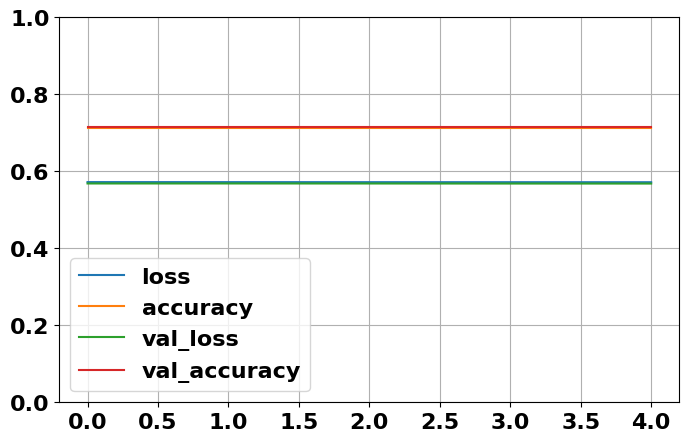

In [119]:
# Print out our SDG loss and accuracy info per epoch
pd.DataFrame(history_sgd.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

In [120]:
model.evaluate(X_test.astype('float32'), y_test.astype('float32'))

 24/676 [>.............................] - ETA: 1s - loss: 0.5795 - accuracy: 0.7070 

676/676 [==============================] - 2s 3ms/step - loss: 0.5681 - accuracy: 0.7161


[0.5680878162384033, 0.7160688042640686]